2021-07-20


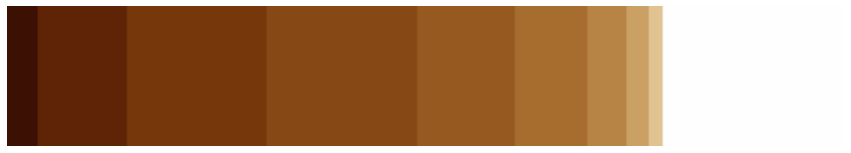

2021-07-19


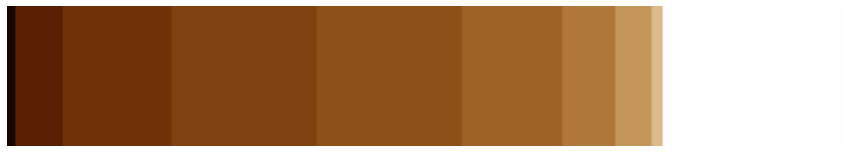

2021-07-18


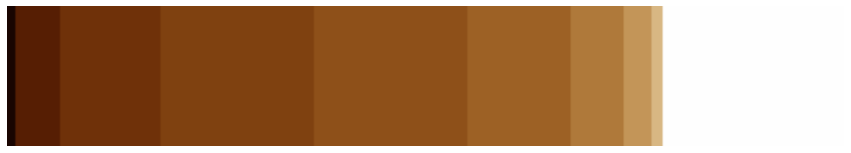

2021-07-17


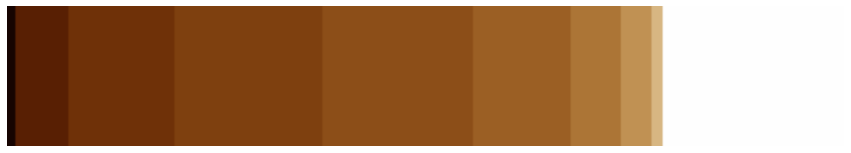

2021-07-16


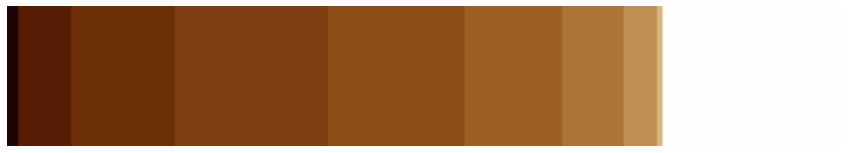

In [171]:
import math
import cv2
import numpy as np 
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

def BGR2RGB(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

def resize(img, x ,y):
    img = cv2.resize(img , dsize=(x, y), interpolation=cv2.INTER_AREA)
    return img

def crop_img(img, a1, b1, r):
    result = img2[a1-r:a1+r,b1-r:b1+r]
    return img

def remove_background(img, a1, b1, x, y, r):
    img = img[a1-r:a1+r,b1-r:b1+r]
    img = img[y:y+r*2, x:x+r*2]
    mask = np.full((img.shape[0], img.shape[1]), 0, dtype=np.uint8) 
    cv2.circle(mask,(r,r), r, (255, 255, 255),-1)
    fg = cv2.bitwise_or(img, img, mask=mask)
    mask = cv2.bitwise_not(mask)
    background = np.full(img.shape, 255, dtype=np.uint8)
    bk = cv2.bitwise_or(background, background, mask=mask)
    img = cv2.bitwise_or(fg, bk)
    return img

def img_reshape(img):
    img = img.reshape((img.shape[0] * img.shape[1], 3))
    return img

def centroid(clt):
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (data, _) = np.histogram(clt.labels_, bins=numLabels)
    data = data.astype("float")
    data /= data.sum()
    return data

def plotColors(data, centroids):
    bar = np.zeros((50, 300, 3), dtype="uint8")
    startNum = 0
    zipdata = []
    for i in range(0, len(centroids)):
        zipdata.append([[centroids[i][0], centroids[i][1], centroids[i][2]], data[i]])
    zipdata.sort()
    n1 = []
    n2 = []
    for i in range(0, len(zipdata)):
        n1.append(zipdata[i][0])
    for i in range(0, len(zipdata)):
        n2.append(zipdata[i][1])
    n1 = np.array(n1)
    for (percent, color) in zip(n2, n1):
        endNum = startNum + (percent * 300)
        cv2.rectangle(bar, (int(startNum), 0), (int(endNum), 50), color.astype("uint8").tolist(), -1)
        startNum = endNum
    return bar

def drawPlot(data, clt):
    bar = plotColors(data, clt.cluster_centers_)
    plt.rcParams["figure.figsize"] = (15,8)
    plt.axis("off")
    plt.imshow(bar)
    plt.show()

def printColorData(clt):
    for center in clt.cluster_centers_:
        print(center)
    
def KNN(k):
    clt = KMeans(n_clusters = k)
    return clt

def imageProcessing(img):
    img2 = img.copy()
    img2 = resize(BGR2RGB(img2), 250, 250)
    img2 = remove_background(img2, 125, 125, 0, 0, 100)
    img2 = img_reshape(img2)
    return img2

def analyzingImage(img, k):
    img2 = imageProcessing(img)
    clt = KNN(k)
    clt.fit(img2)
    data = centroid(clt)
    drawPlot(data, clt)
    
    """
    colorsRatio = []
    i = 0
    for center in clt.cluster_centers_:
        colorsRatio.append([[int(center[0]), int(center[1]), int(center[2])], round(data[i]*100, 2)])
        i += 1
    colorsRatio.sort()
    for j in range(0, len(colorsRatio)):
        print(colorsRatio[j][0],':', colorsRatio[j][1],'%')
    """

def main():
    print("2021-07-20")
    img = cv2.imread('./DATA/20210720.jpg')
    analyzingImage(img, 10) 
    print("2021-07-19")
    img = cv2.imread('./DATA/20210719.jpg')
    analyzingImage(img, 10)    
    print("2021-07-18")
    img = cv2.imread('./DATA/20210718.jpg')
    analyzingImage(img, 10)    
    print("2021-07-17")
    img = cv2.imread('./DATA/20210717.jpg')
    analyzingImage(img, 10)    
    print("2021-07-16")
    img = cv2.imread('./DATA/20210716.jpg')
    analyzingImage(img, 10)
    
if __name__ == "__main__":
    main()